In [12]:
# import necessary libraries
import jplephem
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
"""
jpl ephemeris data can be extracted via the terminal with the following commands

python -m jplephem comment de421.bsp
python -m jplephem daf de421.bsp
python -m jplephem spk de421.bsp
"""

'\njpl ephemeris data can be extracted via the terminal with the following commands\n\npython -m jplephem comment de421.bsp\npython -m jplephem daf de421.bsp\npython -m jplephem spk de421.bsp\n'

In [4]:
# kernel details the segments available in the .bsp file

from jplephem.spk import SPK
kernel = SPK.open('de421.bsp')
print(kernel)


File type DAF/SPK and format LTL-IEEE with 15 segments:
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Mercury Barycenter (1)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Venus Barycenter (2)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Earth Barycenter (3)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Mars Barycenter (4)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Jupiter Barycenter (5)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Saturn Barycenter (6)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Uranus Barycenter (7)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Neptune Barycenter (8)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Pluto Barycenter (9)
2414864.50..2471184.50  Type 2  Solar System Barycenter (0) -> Sun (10)
2414864.50..2471184.50  Type 2  Earth Barycenter (3) -> Moon (301)
2414864.50..2471184.50  Type 2  Earth Bary

In [4]:
# using the .bsp file, it is possible to determine the position of a planet wrt to a certain reference point
# for example we consider saturn on feb 8 2015 wrt to solar system barycenter
# very confused about the date convention system 
# date stored in terms of UTC seconds (from 1980)

# set the vector output rounding
np.set_printoptions(precision=3)

# position and velocity of the planet can be determined
position, velocity = kernel[0,6].compute_and_differentiate(2457061.5)
print("position of saturn is ")
print(position)
print("the velocity as this point is ")
print(velocity)

# note that velocity is given in distance travelled by day (can be converted to other units)
# distance is given in kilometers

position of saturn is 
[-7.836e+08 -1.183e+09 -4.549e+08]
the velocity as this point is 
[ 664075.449 -397634.555 -192833.867]


In [9]:

def position_array(planets, type):

    if type == "3d":
        positions_array = ([], [], [])

    if type == "2d":
        positions_array = ([], [])    
    for i in planets:
        if type == "3d":
            positions_array[0].append(i[0])
            positions_array[1].append(i[1])
            positions_array[2].append(i[2])
        if type == "2d":
            positions_array[0].append(i[0])
            positions_array[1].append(i[1])

    return positions_array




In [6]:
# extract sun and earth position on Jan 18th 2000 and plot on a 2D map
# write function of gravitational potential and plot a plt.imshow of the grav potential everywhere within the range of the orbit, caused 
# the combination of gravitational potential from both the sun and the earth

import astropy
from astropy.time import Time
from astropy import units as u

# time package allows you to convert normal date and time to julian date
t = Time("2000-01-18 11:00")
t_jd = t.jd # converts to julian date

# find position of earth and sun at this time and converting to AU
sun_position = kernel[0,10].compute(t.jd) 
earth_position = kernel[0,3].compute(t.jd) 

# append to positions array
positions = position_array((sun_position, earth_position), "3d")
print(positions)





print(sun_position, earth_position)

([-1053774.588022157, -69374340.5935376], [-412975.41458699876, 119190026.24375243], [-145701.60696033403, 51708432.16542295])
[-1053774.58802216  -412975.414587    -145701.60696033] [-6.93743406e+07  1.19190026e+08  5.17084322e+07]


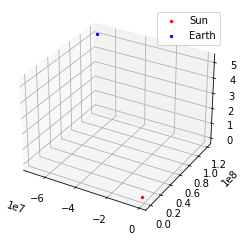

In [7]:
# plot 3d position 

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.scatter(positions[0][0], positions[1][0], positions[2][0], c = 'red', marker = ".", label = "Sun")
ax.scatter(positions[0][1], positions[1][1], positions[2][1], c = 'blue', marker = ".", label = "Earth")
plt.legend()
plt.show()

In [20]:
# now plot on a 2d axes (remove z dimension) and plot grav potential as an imshow graph

import scipy
from scipy import constants

# defining a function to calculate the gravitational potential

mass_sun = 1.989e30
mass_earth = 5.972e24
mass_array = []
mass_array.append(mass_sun)
mass_array.append(mass_earth)

def grav_potential(r, mass):

    # this function calculates the gravitational potential at a point due to contribution of an array of masses

    
    potential = -(constants.G * mass)/r

    return potential
        

([-1053774.588022157, -69374340.5935376], [-412975.41458699876, 119190026.24375243])


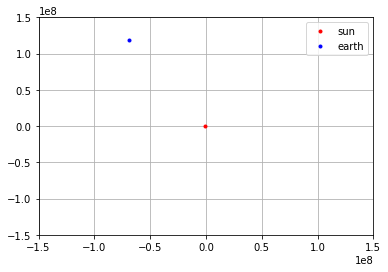

In [16]:

# now we only want the 2d positions array

two_positions = position_array((sun_position, earth_position),"2d")
print(two_positions)

plt.figure("2d plot of earth and sun")
plt.plot(two_positions[0][0], two_positions[1][0], ".", c = "red", label = "sun")
plt.plot(two_positions[0][1], two_positions[1][1], ".", c = "blue", label = "earth")
plt.legend()
plt.xlim([-1.5e8, 1.5e8])
plt.ylim([-1.5e8, 1.5e8])

plt.grid()
plt.show()

# we want to find the gravitational potential in a 2d array for the orbit of the earth around the sun
# the radius of orbit of the earth is approximately 1.5x10^8 km approximating the orbit as circular
# so take a square area of length 3x10^8 with increments at every 6x10^6 km to get 50x50 inputs




In [51]:
# we want to find the gravitational potential in a 2d array for the orbit of the earth around the sun
# the radius of orbit of the earth is approximately 1.5x10^8 km approximating the orbit as circular
# so take a square area of length 3x10^8 with increments at every 6x10^6 km to get 50x50 inputs
# note that the sun is essentially at the center already


# creating the 2d array
x_coord = np.arange(-1.5e8, 1.5e8, 3e7)
y_coord = np.arange(-1.5e8, 1.5e8, 3e7)
X,Y = np.meshgrid(x_coord, y_coord)


def potential_array(X,Y, mass_array, two_positions):

    # function will iterate through each coordinate point and calculate the grav potential at that point
    potential = np.zeros((len(X),len(Y)))
    
    for i in range(len(X)):
        for j in range(len(Y)):
            # looping through the x and y coordinates in the mesh grid
            for x in range(len(mass_array)):
                # loops through the number of masses to consider and finds the radial distance of the mass to the point on the mesgrid
                x_diff = abs(X[i][j] - two_positions[0][x])
                y_diff = abs(Y[i][j] - two_positions[1][x])
                
                r = np.sqrt(x_diff**2 + y_diff**2)

                potential[i][j] += grav_potential(r, mass_array[x])

    
    return potential

                
potential_values = potential_array(X,Y, mass_array, two_positions)
print(potential_values)




[[-6.28872747e+11 -6.94623355e+11 -7.62795524e+11 -8.25663629e+11
  -8.71294019e+11 -8.87434910e+11 -8.68930527e+11 -8.21654053e+11
  -7.58062669e+11 -6.89862738e+11]
 [-6.94989369e+11 -7.87056503e+11 -8.90723106e+11 -9.95698165e+11
  -1.07893040e+12 -1.11004405e+12 -1.07445227e+12 -9.88689473e+11
  -8.83212742e+11 -7.80151420e+11]
 [-7.63765982e+11 -8.91495182e+11 -1.05156078e+12 -1.23789257e+12
  -1.41004540e+12 -1.48171911e+12 -1.40009351e+12 -1.22450159e+12
  -1.03926422e+12 -8.81497533e+11]
 [-8.27512368e+11 -9.97859293e+11 -1.23996731e+12 -1.58383369e+12
  -2.00393233e+12 -2.22751845e+12 -1.97567017e+12 -1.55607207e+12
  -1.21994292e+12 -9.83898402e+11]
 [-8.74195442e+11 -1.08306511e+12 -1.41620257e+12 -2.01276922e+12
  -3.20720849e+12 -4.48398520e+12 -3.09502313e+12 -1.95669246e+12
  -1.38658610e+12 -1.06527988e+12]
 [-8.91272867e+11 -1.11606226e+12 -1.49248255e+12 -2.25203166e+12
  -4.58568979e+12 -1.17291819e+14 -4.27452608e+12 -2.17429519e+12
  -1.45793675e+12 -1.09663057e+12

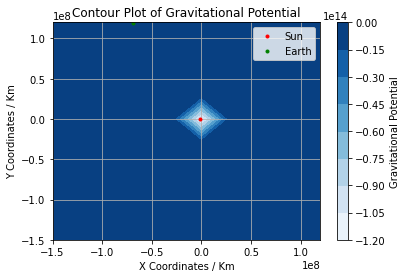

In [50]:
# now we want to plot the potential values as an imshow graph

plt.figure("gravitational potential figure")
plt.contourf(X,Y,potential_values, cmap = 'Blues')
plt.plot(two_positions[0][0], two_positions[1][0], ".", c = "red", label = "Sun")
plt.plot(two_positions[0][1], two_positions[1][1], ".", c = "green", label = "Earth")
plt.xlabel('X Coordinates / Km')
plt.ylabel('Y Coordinates / Km')
plt.title("Contour Plot of Gravitational Potential")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Gravitational Potential')
plt.grid()
plt.legend()
plt.show()